1. Understand prob statement
2. identify problem like regg,classi,clustering.
3. understant the data
   - eda: in eda only we know how good is our data how to preprocess it and all.
4. preprocessing
   - data cleaing
   - outlier treatment
   - label encoding
   - etc
5. scaling data
6. checking correlation
7. prediction
8. model evaluation
9. hyper parameter tuning


In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#%matplotlib inline

In [176]:
pip install openpyxl --upgrade

Note: you may need to restart the kernel to use updated packages.


In [177]:
df=pd.read_excel('data_preprocessing.xlsx')

In [178]:
df.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.0,9,40000.0,Under_Graduate,0.0
1,HR,33.0,12,48000.0,Master,0.0
2,IT,35.0,12,45000.0,Master,5.0
3,IT,NaN,12,46000.0,Graduate,5.0
4,HR,34.0,11,NaN,Graduate,2.0


In [179]:
df.tail(2)

,Dept,Age,Experience,Salary,Education,Projects
31,Marketing,75.0,50,39000.0,Master,1.0
32,HR,NaN,11,42000.0,?,2.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [181]:
df.describe()

,Age,Salary,Projects
count,30.000000,31.000000,27.000000
mean,37.333333,41983.870968,2.148148
std,18.690461,15998.168578,1.261980
min,0.000000,20000.000000,0.000000
25%,29.500000,35500.000000,1.000000
50%,34.500000,42000.000000,2.000000
75%,48.750000,45250.000000,3.000000
max,75.000000,90000.000000,5.000000


In [182]:
df.describe(include='O')

,Dept,Experience,Education
count,31,29,31
unique,4,15,5
top,HR,12,Master
freq,13,6,12


In [183]:
df.isnull().mean() * 100
# % missing values

Dept           6.060606
Age            9.090909
Experience    12.121212
Salary         6.060606
Education      6.060606
Projects      18.181818
dtype: float64

In [184]:
df.isnull().sum().sum()
# total no of missing values.

19

In [185]:
df1=df.copy()

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        31 non-null     object 
 1   Age         30 non-null     float64
 2   Experience  29 non-null     object 
 3   Salary      31 non-null     float64
 4   Education   31 non-null     object 
 5   Projects    27 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.7+ KB


In [187]:
df1.Age=df1.Age.fillna(df1.Age.mean())

In [188]:
df1.Salary=df1.Salary.fillna(df1.Salary.median())
df1.Experience=df1.Experience.replace('.',np.nan).replace('%',np.nan).replace('a',np.nan)
df1.Experience=df1.Experience.astype('float')
df1.Experience=df1.Experience.fillna(df1.Experience.median())

In [189]:
df1.Projects=df1.Projects.fillna(df1.Projects.median())

In [190]:
df1.Dept=df1.Dept.fillna(df1.Dept.mode()[0])

In [191]:
df1.Education=df1.Education.replace('a',np.nan).replace('?',np.nan)
df1.Education=df1.Education.fillna(df1.Education.mode()[0])

In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dept        33 non-null     object 
 1   Age         33 non-null     float64
 2   Experience  33 non-null     float64
 3   Salary      33 non-null     float64
 4   Education   33 non-null     object 
 5   Projects    33 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.7+ KB


In [193]:
df1.Age.unique()
# Age 0 is not a valid value

array([32.        , 33.        , 35.        , 37.33333333, 34.        ,
       56.        , 31.        , 45.        , 50.        , 75.        ,
       29.        , 38.        ,  0.        , 42.        , 52.        ,
       27.        , 51.        , 28.        , 70.        , 19.        ])

In [194]:
df1.Age=df1.Age.replace(0,df1.Age.mean())

In [195]:
df1.Age.unique()

array([32.        , 33.        , 35.        , 37.33333333, 34.        ,
       56.        , 31.        , 45.        , 50.        , 75.        ,
       29.        , 38.        , 42.        , 52.        , 27.        ,
       51.        , 28.        , 70.        , 19.        ])

### Impute all categorical coll all together.

In [196]:
categorical_cols=df1.select_dtypes(include='object').columns.to_list()
categorical_cols

['Dept', 'Education']

In [197]:
df1[categorical_cols]=df1[categorical_cols].fillna(df1[categorical_cols].mode().iloc[0])

In [198]:
df1[categorical_cols].mode().iloc[0]

Dept             HR
Education    Master
Name: 0, dtype: object

### Impute all numerical col all together.

In [199]:
numerical_cols=df1.select_dtypes(exclude='object').columns.to_list()
numerical_cols

['Age', 'Experience', 'Salary', 'Projects']

In [200]:
df1[numerical_cols]=df1[numerical_cols].fillna(df1[numerical_cols].median())

In [201]:
df1[numerical_cols].median()

Age              37.333333
Experience       12.000000
Salary        42000.000000
Projects          2.000000
dtype: float64

### drop a columns

In [202]:
df2=df1.copy()

In [203]:
df2.drop(columns=['Projects'],inplace=True)

In [204]:
df2.head()

,Dept,Age,Experience,Salary,Education
0,HR,32.000000,9.0,40000.0,Under_Graduate
1,HR,33.000000,12.0,48000.0,Master
2,IT,35.000000,12.0,45000.0,Master
3,IT,37.333333,12.0,46000.0,Graduate
4,HR,34.000000,11.0,42000.0,Graduate


### Drop missing values

In [205]:
df2.dropna(inplace=True)

### Outlier Treatment

<Axes: >

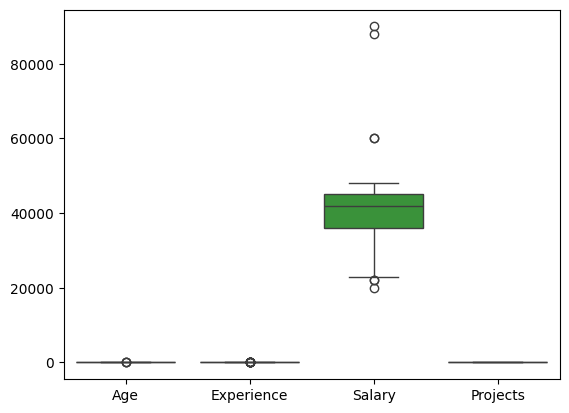

In [206]:
sns.boxplot(df1)

1. either we can drop outlier
2. or we can capp

In [207]:
# IQR Method

q1=df1.select_dtypes(exclude='object').quantile(.25)
q3=df1.select_dtypes(exclude='object').quantile(.75)
iqr=q3-q1
ul=(q3+1.5*iqr)
ll=(q1-1.5*iqr)

ul

Age              64.5
Experience       13.5
Salary        58500.0
Projects          6.0
dtype: float64

In [208]:
ll

Age              12.5
Experience        9.5
Salary        22500.0
Projects         -2.0
dtype: float64

### Removeable of outlier

In [209]:
df2=df1.select_dtypes(exclude='object')[~((df1.select_dtypes(exclude='object')<(ll))|(df1.select_dtypes(exclude='object')>(ul))).any(axis=1)].copy()

In [210]:
df2

,Age,Experience,Salary,Projects
1,33.000000,12.0,48000.0,0.0
2,35.000000,12.0,45000.0,5.0
3,37.333333,12.0,46000.0,5.0
4,34.000000,11.0,42000.0,2.0
5,33.000000,13.0,42000.0,1.0
6,56.000000,12.0,39000.0,2.0
7,37.333333,10.0,42000.0,2.0
8,31.000000,12.0,36000.0,2.0
10,50.000000,12.0,46000.0,3.0
13,32.000000,11.0,39000.0,2.0


### Capping approch

In [211]:
df3=df1.select_dtypes(exclude='object').copy()

In [212]:
df3['Age']=np.where(df3['Age']>ul['Age'],ul['Age'],np.where(df3['Age']<ll['Age'],ll['Age'],df3['Age']))

In [213]:
df3['Experience']=np.where(df3['Experience']>ul['Experience'],ul['Experience'],np.where(df3['Experience']<ll['Experience'],ll['Experience'],df3['Experience']))
df3['Salary']=np.where(df3['Salary']>ul['Salary'],ul['Salary'],np.where(df3['Salary']<ll['Salary'],ll['Salary'],df3['Salary']))
df3['Projects']=np.where(df3['Projects']>ul['Projects'],ul['Projects'],np.where(df3['Projects']<ll['Projects'],ll['Projects'],df3['Projects']))




<Axes: >

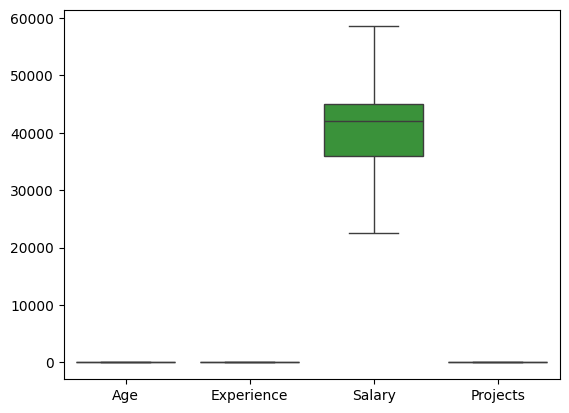

In [214]:
sns.boxplot(df3)

In [215]:
# num_cols=["Age","Experience","Salary","Projects"]
# df6=df1.copy()
# df6[num_cols]=np.where(df6[num_cols]>ul,ul,np.where(df6[num_cols]<ll,ll,df6[num_cols]))

### Z-Score method

ul = mue + 3 * sigma

ll = mue - 3 * sigma

In [216]:
df4=df1.select_dtypes(exclude='object').copy()

In [217]:
ul=df4.mean() + 3* df4.std()
ll=df4.mean() - 3* df4.std()

In [218]:
ul

Age              80.304298
Experience       44.985484
Salary        88455.330318
Projects          5.538248
dtype: float64

In [219]:
ll

Age              1.150248
Experience     -18.712757
Salary       -4485.633348
Projects        -1.295824
dtype: float64

### Encoding

In [220]:
df5=df1.copy()

In [221]:
# astype approch
df5['Education']=df5['Education'].astype('category').cat.codes

In [222]:
df5.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,2,0.0
1,HR,33.000000,12.0,48000.0,1,0.0
2,IT,35.000000,12.0,45000.0,1,5.0
3,IT,37.333333,12.0,46000.0,0,5.0
4,HR,34.000000,11.0,42000.0,0,2.0


In [223]:
#pip install scikit-learn

In [224]:
df6=df1.copy()

In [225]:
# label encoder approch

from sklearn import preprocessing

label=preprocessing.LabelEncoder()

df6.Dept=label.fit_transform(df6.Dept)


In [226]:
df6.head()

,Dept,Age,Experience,Salary,Education,Projects
0,0,32.000000,9.0,40000.0,Under_Graduate,0.0
1,0,33.000000,12.0,48000.0,Master,0.0
2,1,35.000000,12.0,45000.0,Master,5.0
3,1,37.333333,12.0,46000.0,Graduate,5.0
4,0,34.000000,11.0,42000.0,Graduate,2.0


In [227]:
df6.Dept.unique()

array([0, 1, 2, 3])

In [231]:
# mapping approach : this valid if we need to give weightage our own way (business logic) on nominal data.
df8=df1.copy()

In [232]:
df8["Education"]=df8["Education"].map({"Under_Graduate":0,"Graduate":1,"Master":2})

In [233]:
df8.head()

,Dept,Age,Experience,Salary,Education,Projects
0,HR,32.000000,9.0,40000.0,0,0.0
1,HR,33.000000,12.0,48000.0,2,0.0
2,IT,35.000000,12.0,45000.0,2,5.0
3,IT,37.333333,12.0,46000.0,1,5.0
4,HR,34.000000,11.0,42000.0,1,2.0


#### Label encoding and astype encoding is only suitable on ordinal column coz model will give more weightage to higher value.

In [228]:
# one hot encoding approch

df7=df1.copy()

In [229]:
df7=pd.get_dummies(df7,columns=['Dept','Education'],dtype=int)

In [230]:
df7.head()

,Age,Experience,Salary,Projects,Dept_HR,Dept_IT,Dept_Marketing,Dept_Sales,Education_Graduate,Education_Master,Education_Under_Graduate
0,32.000000,9.0,40000.0,0.0,1,0,0,0,0,0,1
1,33.000000,12.0,48000.0,0.0,1,0,0,0,0,1,0
2,35.000000,12.0,45000.0,5.0,0,1,0,0,0,1,0
3,37.333333,12.0,46000.0,5.0,0,1,0,0,1,0,0
4,34.000000,11.0,42000.0,2.0,1,0,0,0,1,0,0


In [234]:
# If the is 3 category one 2 is required ML model will automatically identify other category. so we use  drop_first=True else multi colenearity will cause.
df9=df1.copy()
df9=pd.get_dummies(df9,columns=["Dept","Education"],prefix=["D","Edu"],drop_first=True)